<a href="https://colab.research.google.com/github/Sakthipriya-2006/Sakthipriya/blob/main/Priya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from google.colab import files
uploaded = files.upload()

Saving RTA Dataset.csv to RTA Dataset.csv


In [3]:
df = pd.read_csv('RTA Dataset.csv')
 # Update with your actual file name

In [4]:
# Handle missing values
df.dropna(inplace=True)

# Encode categorical columns
le = LabelEncoder()
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Define features and target
X = df.drop('Accident_severity', axis=1)
y = df['Accident_severity']

# Normalize/standardize (optional)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

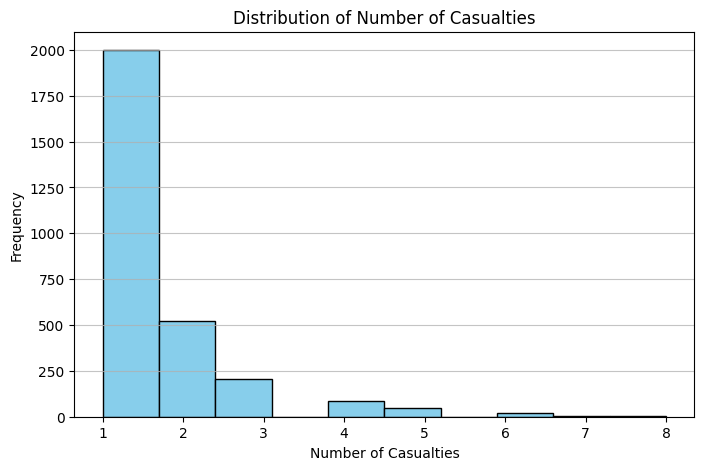

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['Number_of_casualties'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Casualties')
plt.xlabel('Number of Casualties')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


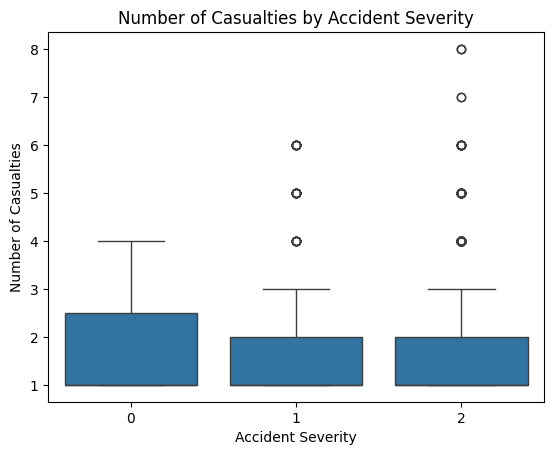

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Accident_severity', y='Number_of_casualties', data=df)
plt.title('Number of Casualties by Accident Severity')
plt.ylabel('Number of Casualties')
plt.xlabel('Accident Severity')
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       1.00      0.05      0.10        79
           2       0.86      1.00      0.92       493

    accuracy                           0.86       578
   macro avg       0.62      0.35      0.34       578
weighted avg       0.87      0.86      0.80       578



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


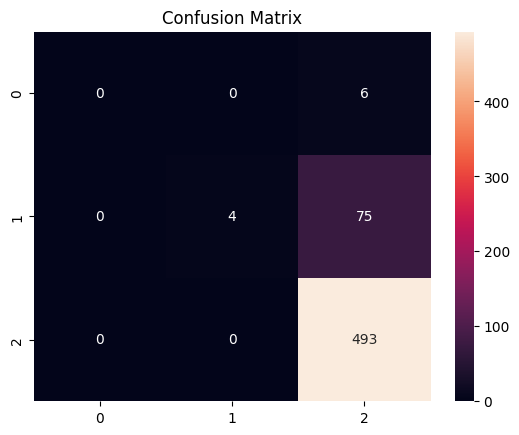

In [9]:

y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [10]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.5 MB/s eta 0:00:00


In [ ]:

import gradio as gr
def predict_severity(*inputs):
    input_array = np.array(inputs).reshape(1, -1)
    input_scaled = scaler.transform(input_array)
    prediction = model.predict(input_scaled)
    return f"Predicted Severity: {prediction[0]}"

input_features = list(X.columns)
interface = gr.Interface(fn=predict_severity,
                         inputs=[gr.Number(label=col) for col in input_features],
                         outputs="text",
                         title="Traffic Accident Severity Predictor")

interface.launch(share=True,debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://4e03d60fa1ca199762.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
